In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import csv
from tqdm import tqdm

In [2]:
coco = COCO('./instances_train2017.json')

loading annotations into memory...
Done (t=31.57s)
creating index...
index created!


In [3]:
catIds = coco.getCatIds(catNms=['person', 'sports ball'])
cat_person = coco.getCatIds(catNms=['person'])

In [4]:
imgIds = coco.getImgIds(catIds=catIds )

In [108]:
img = coco.loadImgs(imgIds[10])[0]
img

{'license': 3,
 'file_name': '000000516116.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000516116.jpg',
 'height': 425,
 'width': 640,
 'date_captured': '2013-11-20 22:47:17',
 'flickr_url': 'http://farm9.staticflickr.com/8007/7155562272_99b9792119_z.jpg',
 'id': 516116}

In [109]:
area_img = img['height'] * img['width']

In [113]:
data_dir = './train'
filepath = os.path.join(data_dir, img['file_name'])
original_img = cv2.imread(filepath, cv2.IMREAD_COLOR)

In [114]:
h, w, c = original_img.shape
h, w, c

(425, 640, 3)

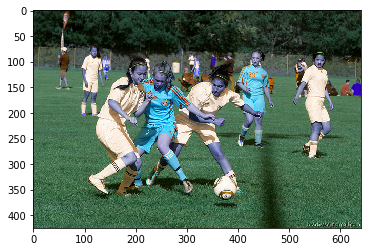

In [115]:
plt.imshow(original_img)

In [103]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=cat_person, iscrowd=0)
anns = coco.loadAnns(annIds)

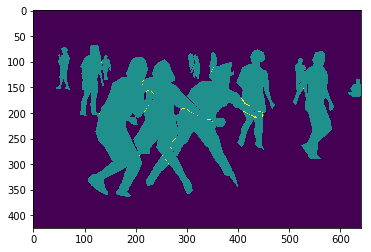

In [104]:
mask = np.zeros((h,w), dtype='uint8')
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

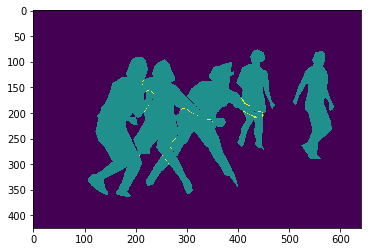

In [107]:
mask = np.zeros((h,w), dtype='uint8')
for i in range(len(anns)):
    if anns[i]['area'] / area_img > 0.024: 
        mask += coco.annToMask(anns[i])
if np.argmax(mask):
    plt.imshow(mask)

In [12]:
!mkdir train_masks

In [13]:
seg_output_path = './train_masks'
ids_train = []

In [14]:
for idx in tqdm(imgIds):
    img = coco.loadImgs(idx)[0]
    h,w = img['height'], img['width']
    
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=cat_person, iscrowd=0)
    anns = coco.loadAnns(annIds)
    
    area_img = h * w
    mask = np.zeros((h,w), dtype='uint8')
    for i in range(len(anns)):
        if anns[i]['area'] / area_img > 0.024: 
            mask += coco.annToMask(anns[i])
        
    if np.argmax(mask):
        ids_train.append(img['file_name'])
        cv2.imwrite(os.path.join(seg_output_path, img['file_name']), mask.astype('uint8') * 255)       

100%|██████████| 4097/4097 [00:17<00:00, 229.83it/s]


In [15]:
with open('train_masks.csv', 'w') as csvfile:
    fieldnames = ['img', 'rle_mask']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for filename in tqdm(ids_train):
        writer.writerow({'img': filename})

100%|██████████| 3535/3535 [00:00<00:00, 103961.36it/s]
